In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import optimize as opt

# 方位係数の低減係数の根拠

本資料のもととなるデータ等は、国総研からの業務発注報告書「H26度 住宅外皮の省エネ技術の定量的評価方法確立のための解析業務」を根拠とする。
データは同報告書内の付録資料「方位係数低減係数(グルーピング)2.xls」より抜粋・整形し、csv形式にした。

## 読み込むCSVデータ

In [2]:
data = pd.read_csv("DistanceCoefficientDegradationData.csv")

注意:

Distanceの単位は、0.9mである。解析は0.9mでモジュール化して実施したため。従って、例えば、Distance=10は、隣等との距離が9mを意味する。

## 方位と地域の区分に関する配列

方位は8方位、地域の区分は8地域である。  
配列としてまとめる。

In [3]:
direction = ["S","SW","W","NW","N","NE","E","SE"]
region = [1,2,3,4,5,6,7,8]

## 地域別・位置関係別・方位別の分析

8方位別にグラフ化する。

### 自棟と隣棟との階数の関係

「1to1」当該住宅の対象とする部位の階数が1階　隣棟が1階建て  
「1to2」当該住宅の対象とする部位の階数が1階　隣棟が2階建て  
「1to3」当該住宅の対象とする部位の階数が1階　隣棟が3階建て  
「2to2」当該住宅の対象とする部位の階数が2階　隣棟が2階建て  
「2to3」当該住宅の対象とする部位の階数が2階　隣棟が3階建て  
「3to3」当該住宅の対象とする部位の階数が3階　隣棟が3階建て  

### 冷房  
「1to1」「2to2」「3to3」に関しては、地域に依らず、方位による違いはあまり見られない一方、それ以外の位置関係では、「南」と「南西と南東」と「その他」の3グループに分かれた。  

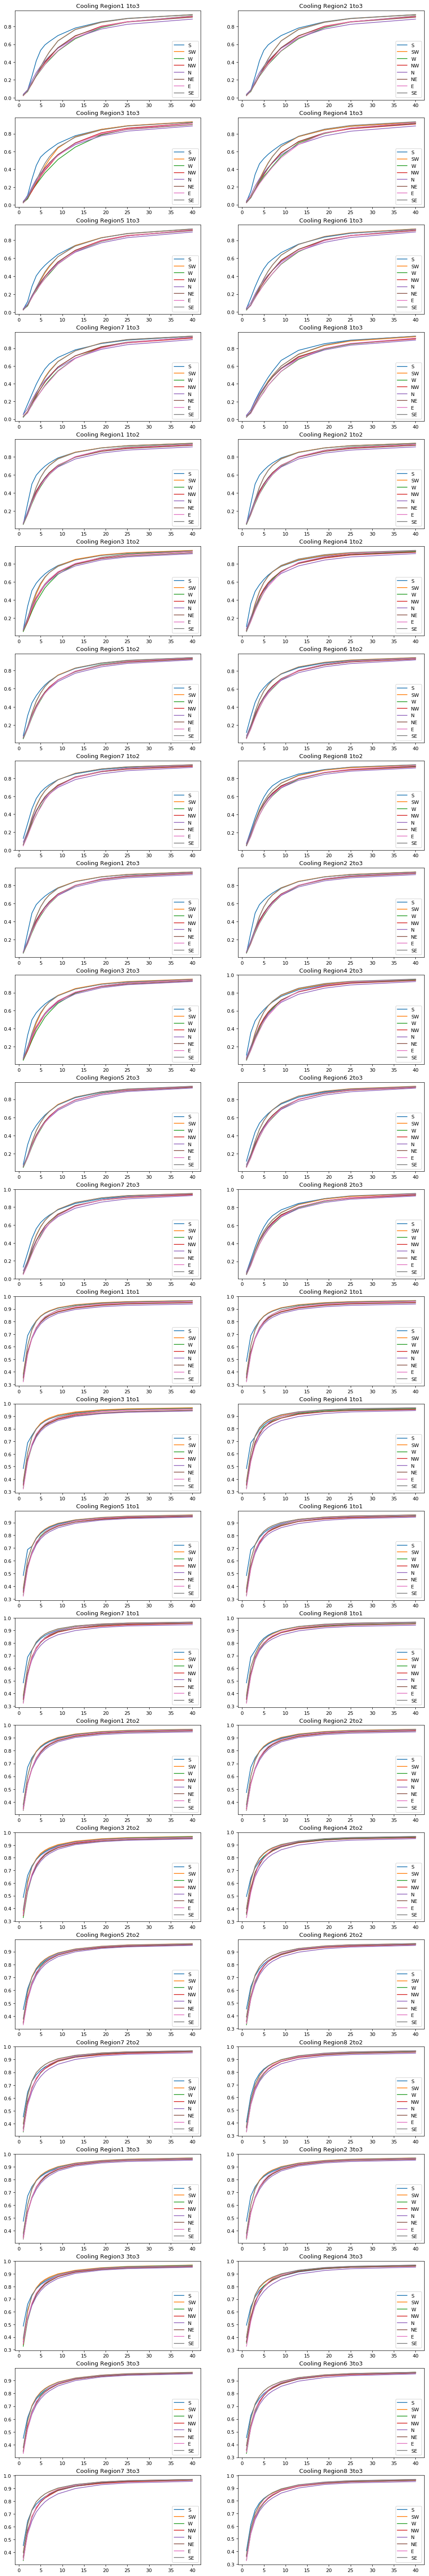

In [4]:
fignum = 48
plt.figure(figsize=(15,4*fignum/2),dpi=80)
s = 'Cooling'
for j, p in enumerate(['1to3','1to2','2to3','1to1','2to2','3to3']):
    for i, r in enumerate(region):
        d = data.query("Region == @r & Season == @s & Pos == @p ")
        plt.subplot(fignum/2,2,j*8+i+1)
        for drt in direction:
            plt.plot(list(d["Distance"]),list(d[drt]),label=drt)
        plt.title(str(s)+" Region"+str(r)+" "+str(p))
        plt.legend()
plt.show()

### 暖房  
冷房同様、「1to1」「2to2」「3to3」に関しては、地域に依らず、方位による違いはあまり見られない（ただし、「1to1」の南のみ、少し他の方位と挙動が異なる。）一方、それ以外の位置関係では、「南」と「その他」の2グループに分かれた。

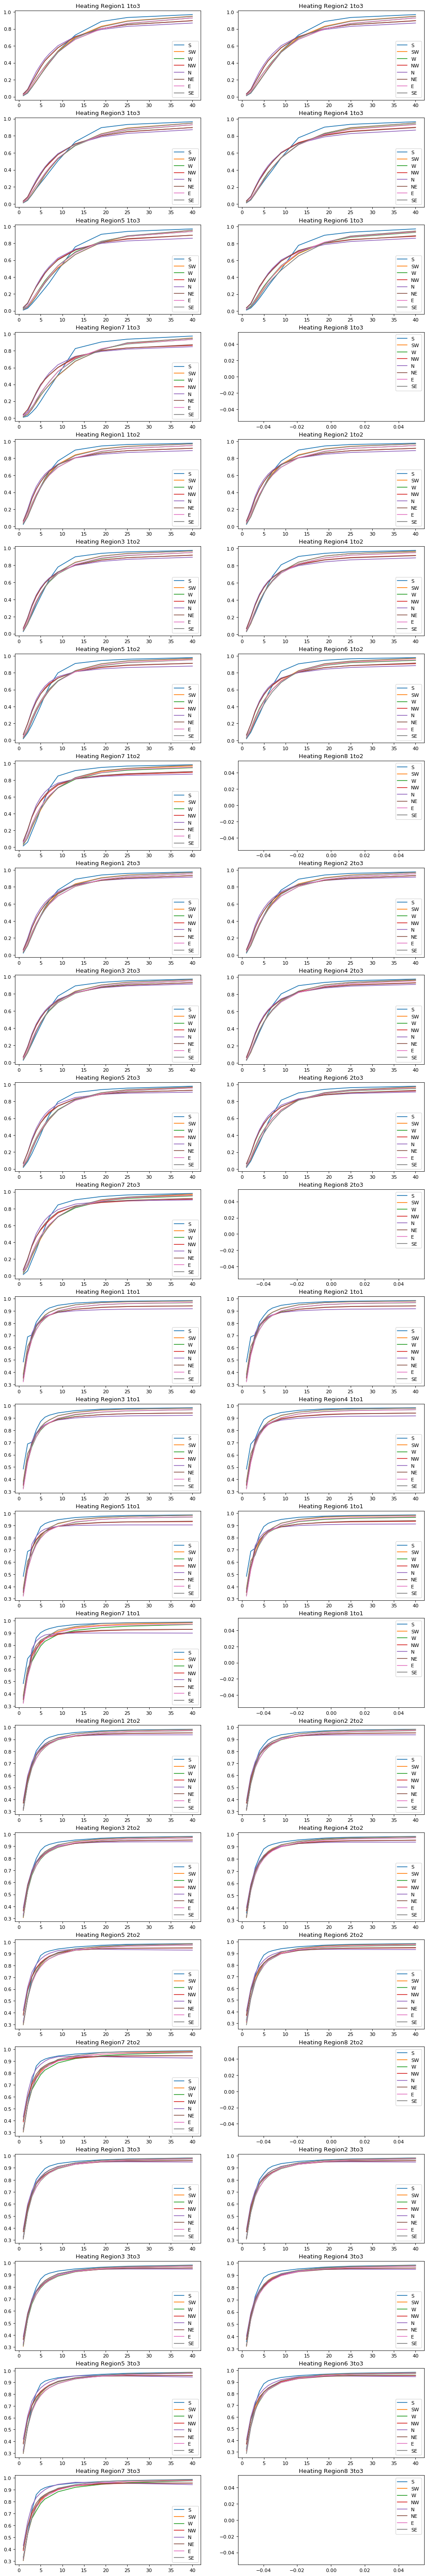

In [5]:
fignum = 48
plt.figure(figsize=(15,4*fignum/2),dpi=80)
s = 'Heating'
for j, p in enumerate(['1to3','1to2','2to3','1to1','2to2','3to3']):
    for i, r in enumerate(region):
        d = data.query("Region == @r & Season == @s & Pos == @p ")
        plt.subplot(fignum/2,2,j*8+i+1)
        for drt in direction:
            plt.plot(list(d["Distance"]),list(d[drt]),label=drt)
        plt.title(str(s)+" Region"+str(r)+" "+str(p))
        plt.legend()
plt.show()

## 位置関係の集約化

1to1 と 2to2 と 3to3 は、相対的な位置関係は同じであるため、区別する必要はなさそうである。  
同様のことは、1to2 と 2to3 にも言えそうである。  
以上のことをグラフ化して確認した。

### 1to1, 2to2, 3to3 の集約化

#### 冷房

若干、南向きでかい離がみられるが、全ケースで集約化可能そうである。

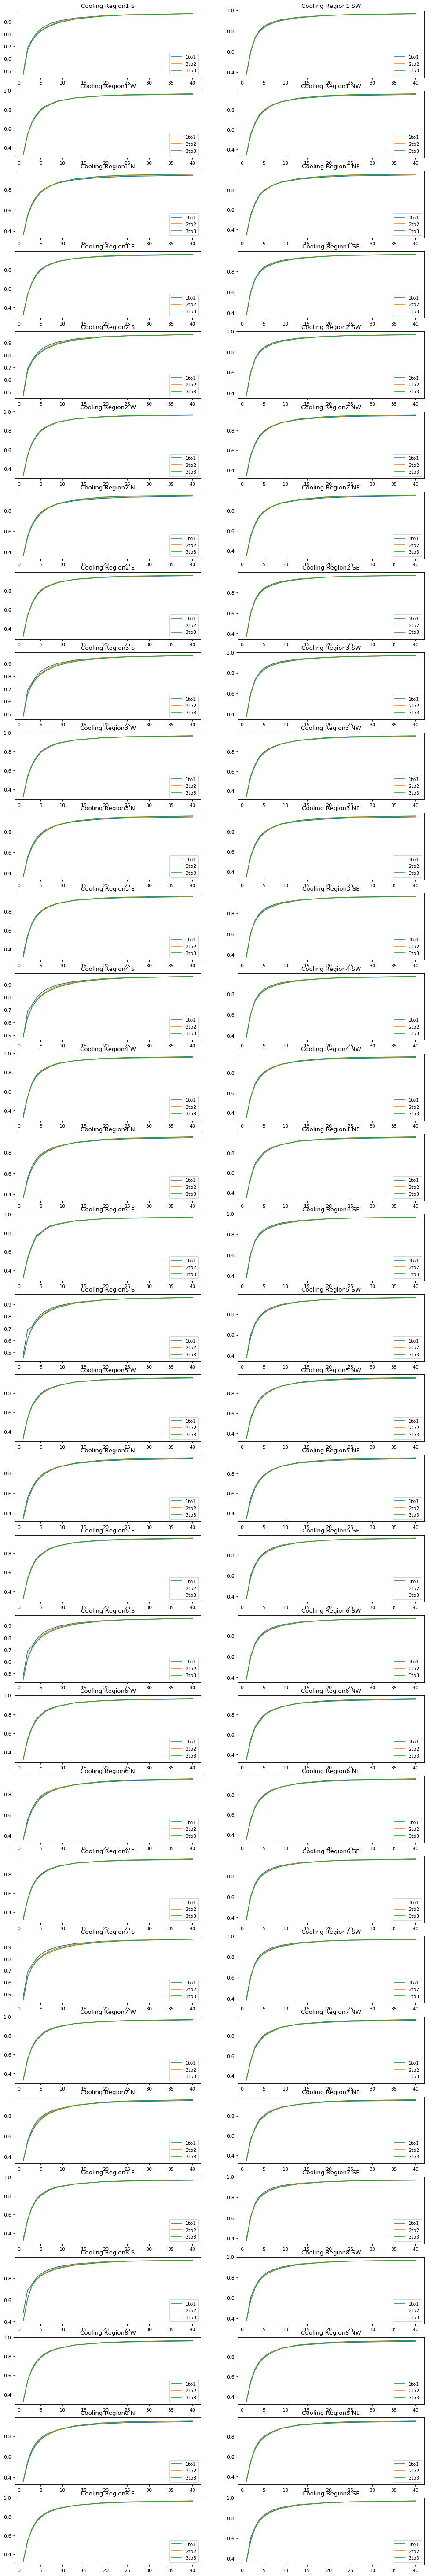

In [6]:
fignum = 64
plt.figure(figsize=(15,3*fignum/2),dpi=80)
s = 'Cooling'
for j, r in enumerate(region):
    for i, drt in enumerate(["S","SW","W","NW","N","NE","E","SE"]):
        plt.subplot(fignum/2,2,j*8+i+1)
        d = data.query("Region == @r & Season == @s & Pos == '1to1' ")
        plt.plot(list(d["Distance"]),list(d[drt]),label="1to1")
        d = data.query("Region == @r & Season == @s & Pos == '2to2' ")
        plt.plot(list(d["Distance"]),list(d[drt]),label="2to2")
        d = data.query("Region == @r & Season == @s & Pos == '3to3' ")
        plt.plot(list(d["Distance"]),list(d[drt]),label="3to3")
        plt.title(str(s)+" Region"+str(r)+" "+str(drt))
        plt.legend()
plt.show()

#### 暖房

問題なく集約可能そうである。  
ただし、南の「1to1」のみ、Distanceが4を切るあたり他との挙動の違いがみられる。

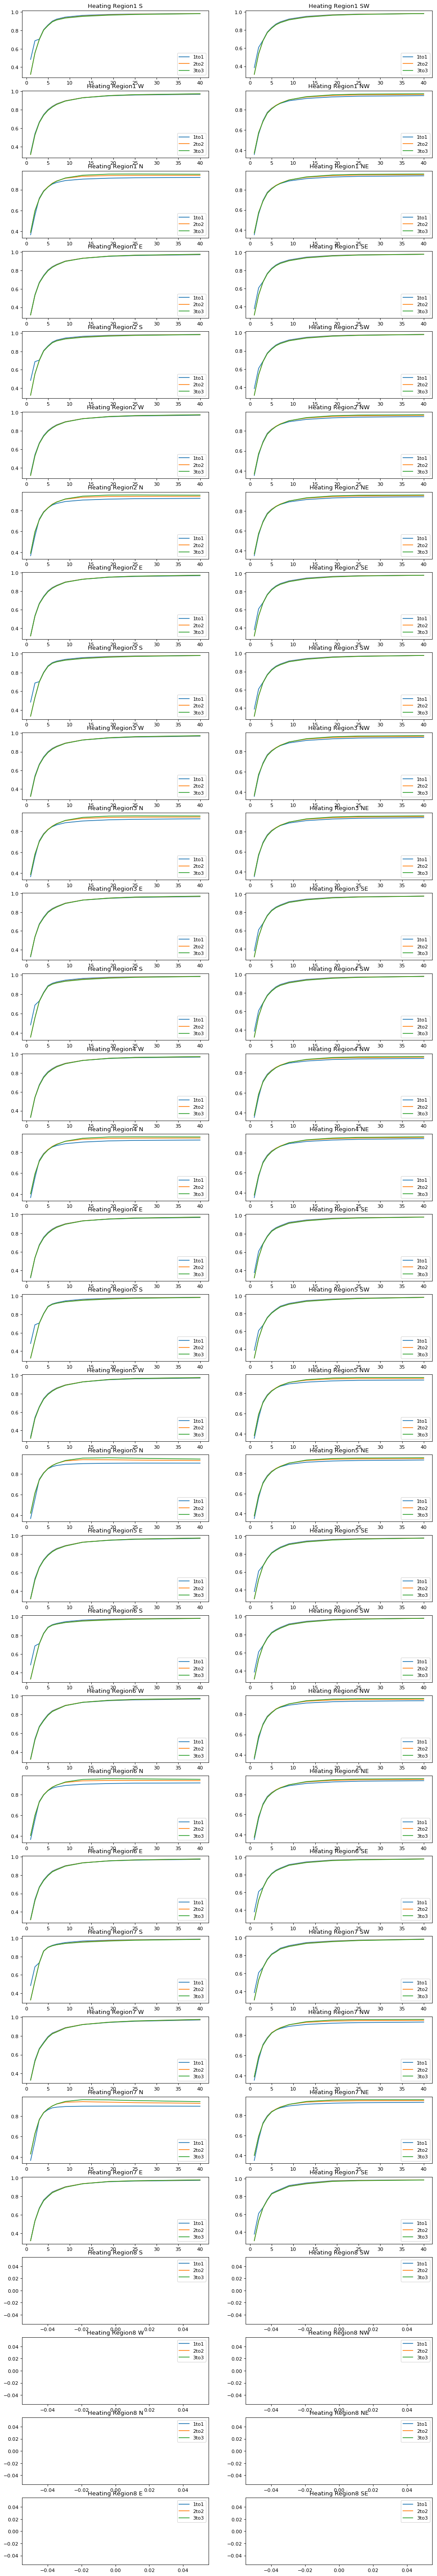

In [7]:
fignum = 64
plt.figure(figsize=(15,3*fignum/2),dpi=80)
s = 'Heating'
for j, r in enumerate(region):
    for i, drt in enumerate(["S","SW","W","NW","N","NE","E","SE"]):
        plt.subplot(fignum/2,2,j*8+i+1)
        d = data.query("Region == @r & Season == @s & Pos == '1to1' ")
        plt.plot(list(d["Distance"]),list(d[drt]),label="1to1")
        d = data.query("Region == @r & Season == @s & Pos == '2to2' ")
        plt.plot(list(d["Distance"]),list(d[drt]),label="2to2")
        d = data.query("Region == @r & Season == @s & Pos == '3to3' ")
        plt.plot(list(d["Distance"]),list(d[drt]),label="3to3")
        plt.title(str(s)+" Region"+str(r)+" "+str(drt))
        plt.legend()
plt.show()

### 1to2, 2to3 の集約化

#### 冷房

問題なく集約化できそうである。

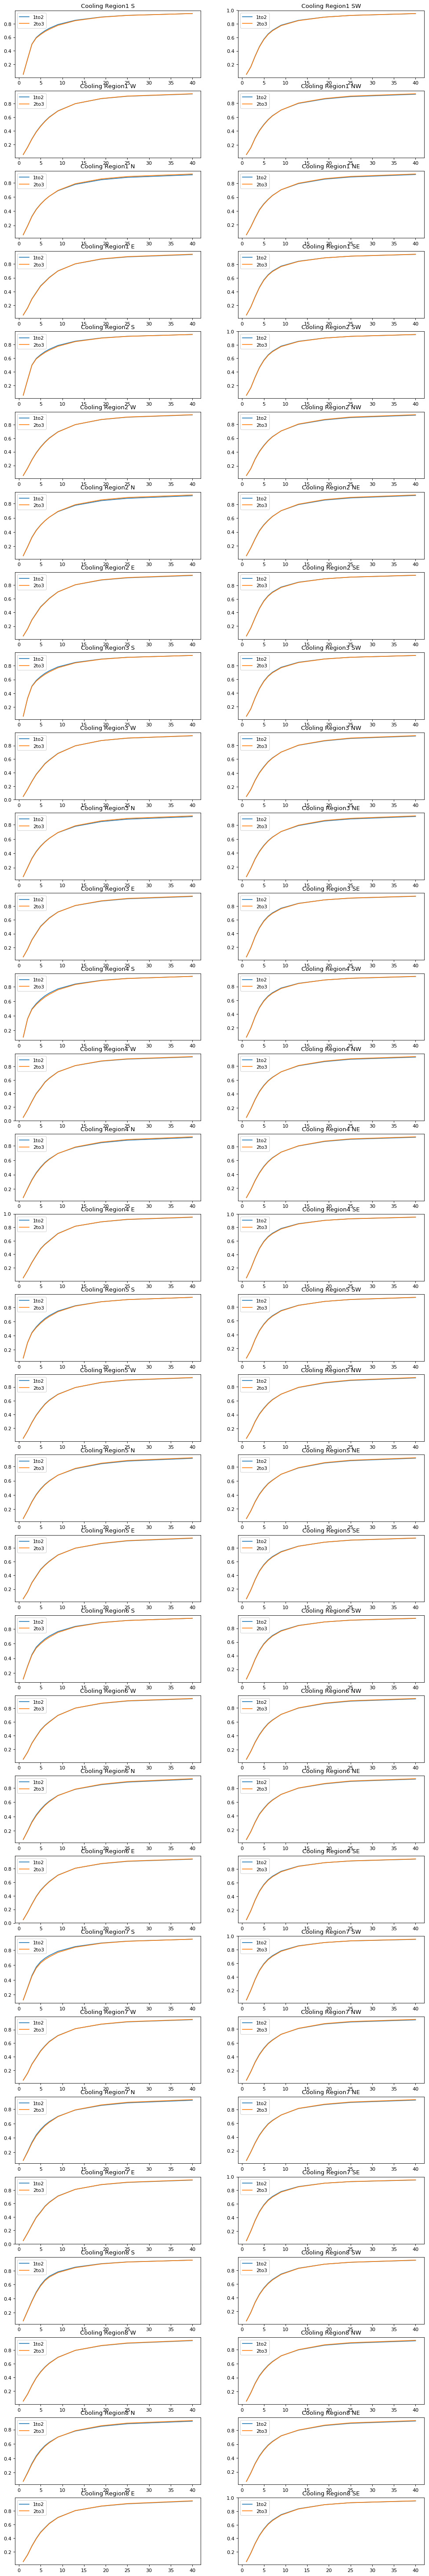

In [8]:
fignum = 64
plt.figure(figsize=(15,3*fignum/2),dpi=80)
s = 'Cooling'
for j, r in enumerate(region):
    for i, drt in enumerate(["S","SW","W","NW","N","NE","E","SE"]):
        plt.subplot(fignum/2,2,j*8+i+1)
        d = data.query("Region == @r & Season == @s & Pos == '1to2' ")
        plt.plot(list(d["Distance"]),list(d[drt]),label="1to2")
        d = data.query("Region == @r & Season == @s & Pos == '2to3' ")
        plt.plot(list(d["Distance"]),list(d[drt]),label="2to3")
        plt.title(str(s)+" Region"+str(r)+" "+str(drt))
        plt.legend()
plt.show()

#### 暖房

問題なく集約化できそうである。

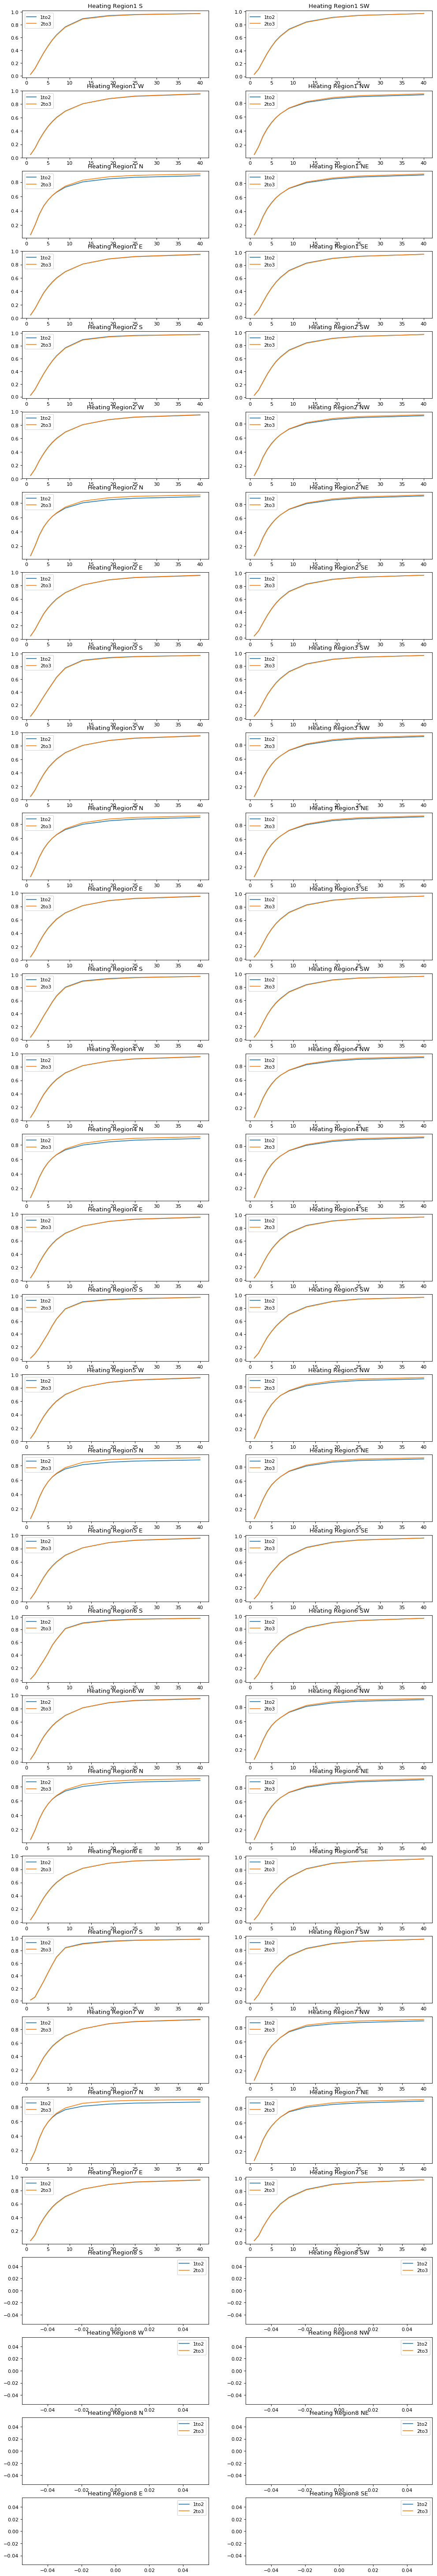

In [9]:
fignum = 64
plt.figure(figsize=(15,3*fignum/2),dpi=80)
s = 'Heating'
for j, r in enumerate(region):
    for i, drt in enumerate(["S","SW","W","NW","N","NE","E","SE"]):
        plt.subplot(fignum/2,2,j*8+i+1)
        d = data.query("Region == @r & Season == @s & Pos == '1to2' ")
        plt.plot(list(d["Distance"]),list(d[drt]),label="1to2")
        d = data.query("Region == @r & Season == @s & Pos == '2to3' ")
        plt.plot(list(d["Distance"]),list(d[drt]),label="2to3")
        plt.title(str(s)+" Region"+str(r)+" "+str(drt))
        plt.legend()
plt.show()

## 地域の集約化

### 冷房

ほぼ問題なく集約化できそうである。

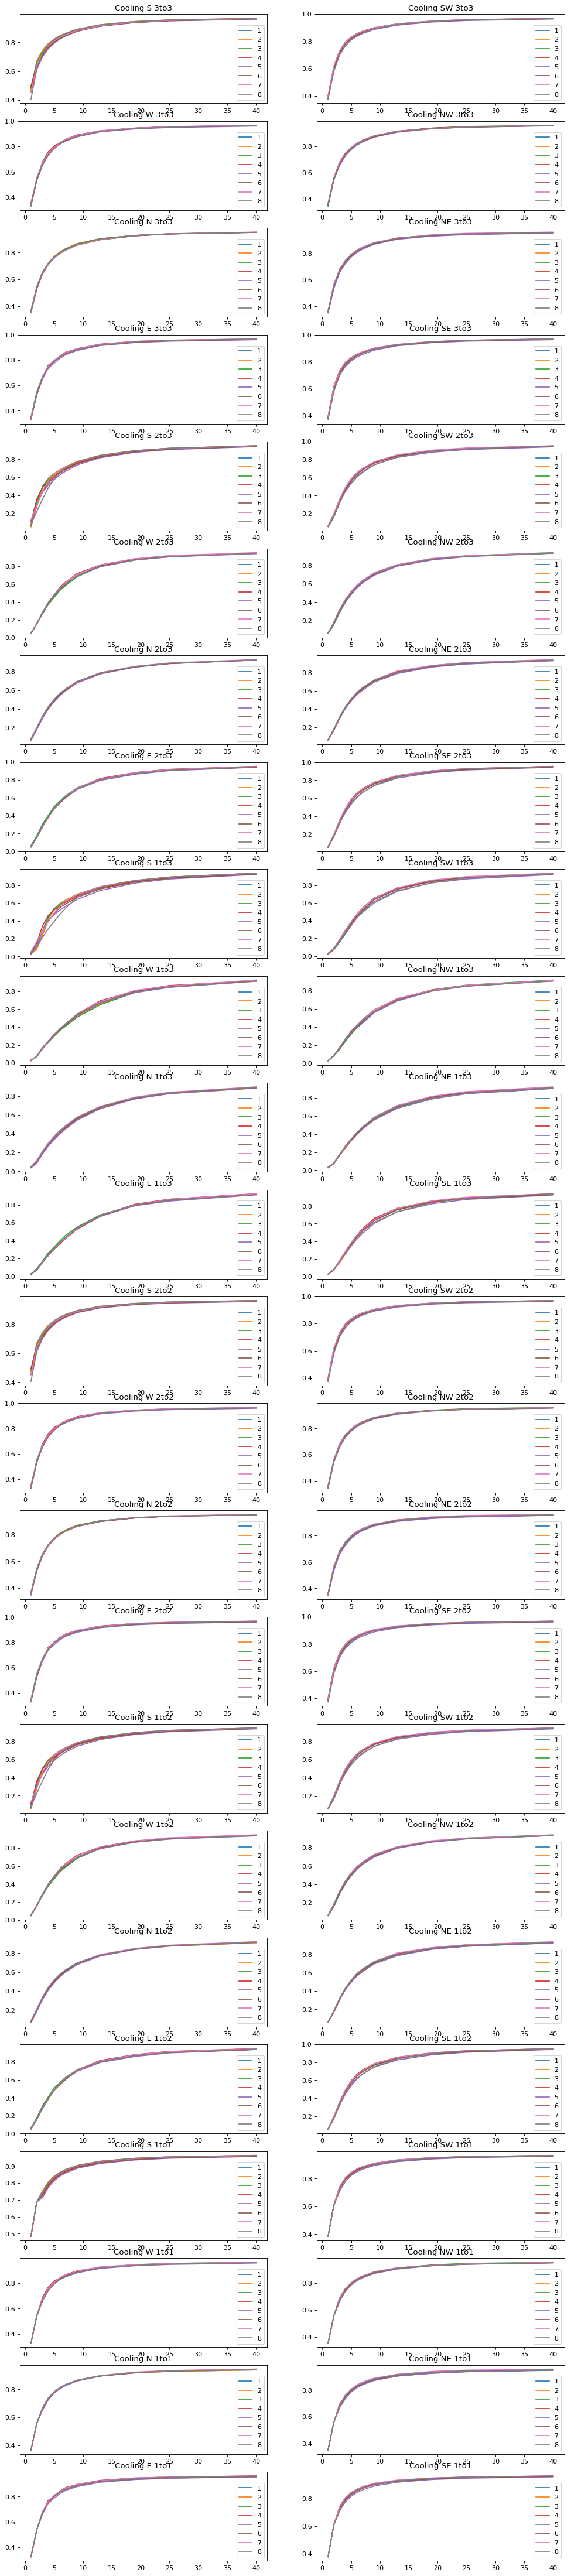

In [10]:
fignum = 48
plt.figure(figsize=(15,3*fignum/2),dpi=80)
s = 'Cooling'
for j, p in enumerate(['3to3','2to3','1to3','2to2','1to2','1to1']):
    for i, drt in enumerate(["S","SW","W","NW","N","NE","E","SE"]):
        plt.subplot(fignum/2,2,j*8+i+1)
        for r in region:
            d = data.query("Region == @r & Season == @s & Pos == @p ")
            plt.plot(list(d["Distance"]),list(d[drt]),label= str(r) )
        plt.title(str(s)+" "+str(drt)+" "+str(p))
        plt.legend()
plt.show()

### 暖房

ほぼ問題なく集約化できそうである。

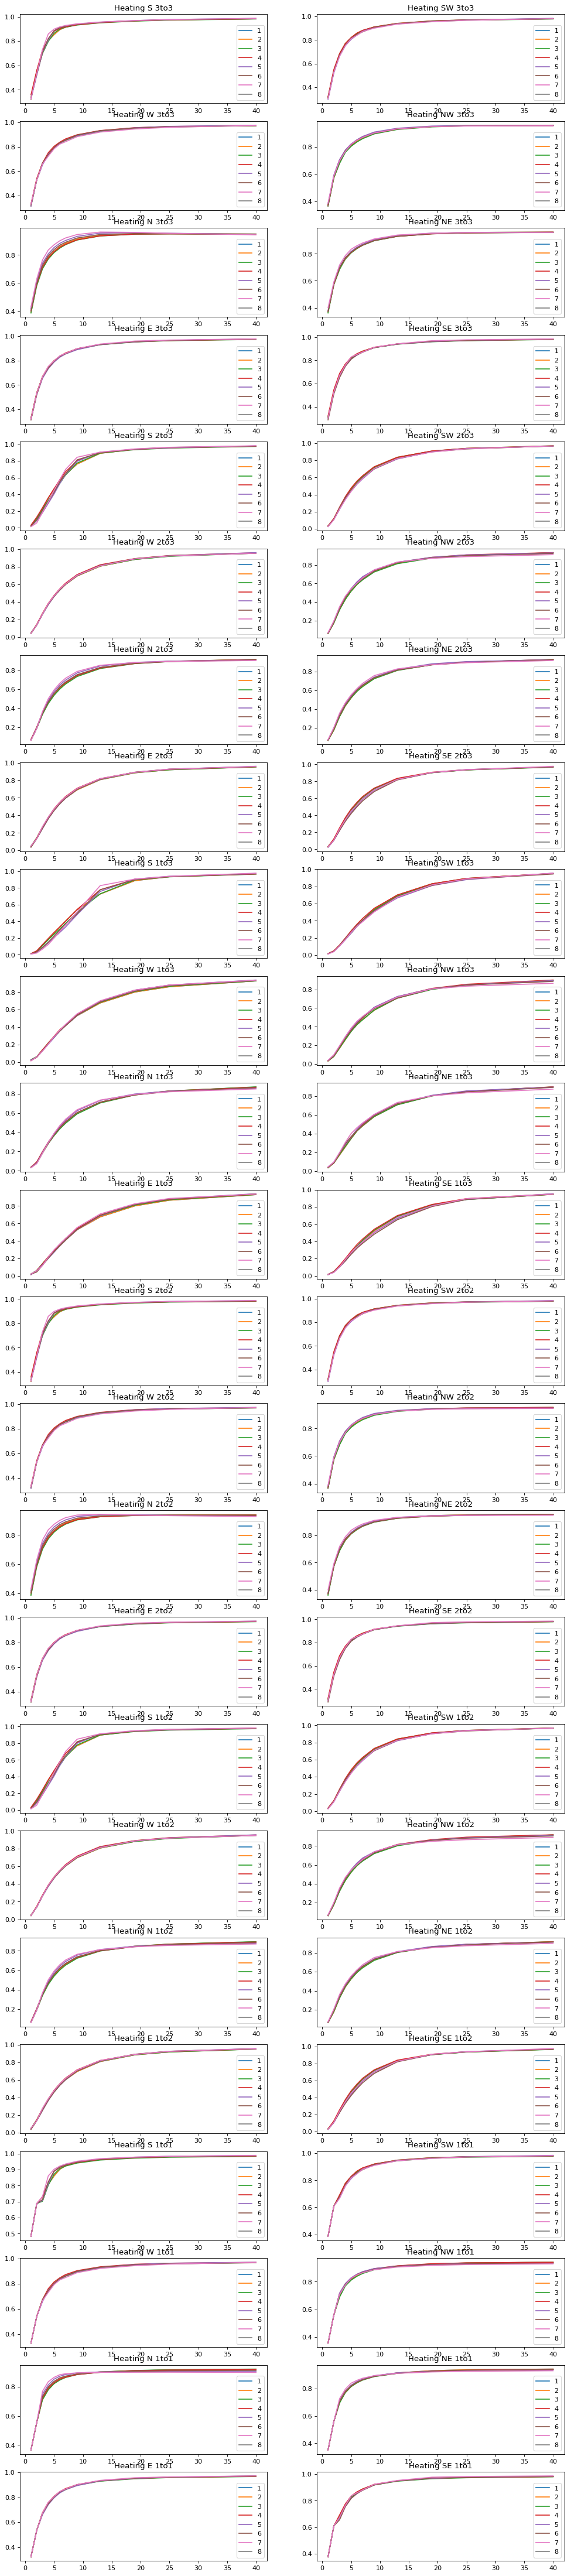

In [11]:
fignum = 48
plt.figure(figsize=(15,3*fignum/2),dpi=80)
s = 'Heating'
for j, p in enumerate(['3to3','2to3','1to3','2to2','1to2','1to1']):
    for i, drt in enumerate(["S","SW","W","NW","N","NE","E","SE"]):
        plt.subplot(fignum/2,2,j*8+i+1)
        for r in region:
            d = data.query("Region == @r & Season == @s & Pos == @p ")
            plt.plot(list(d["Distance"]),list(d[drt]),label= str(r) )
        plt.title(str(s)+" "+str(drt)+" "+str(p))
        plt.legend()
plt.show()

## 結論

- 地域は集約化できそうである。
- 位置関係は「1to1」「2to2」「3to3」のグループ、「1to2」と「2to3」のグループ、「1to3」の3つにグルーピング可能である。
- 方位は集約化は難しそうである。  

ここで、「1to1」「2to2」「3to3」のグループをCategory1、「1to2」「2to3」をCategory2、「1to3」をCategory3と再定義する。

近似曲線は、$x=0$で0に漸近し、$x=+\infty$で1に漸近する関数として、  
$\begin{align}y=\frac{1}{(1+\frac{a}{s})}\end{align}$  
の形を採用するのが良いと思われたが、  
$s=x$だと、Category2と3でDistanceが小さい領域での近似が悪かったため、$s=x^2 + b  x$とした。 
式変形して、  
$\begin{align}y=\frac{1}{(1+\frac{1}{a x^2 + b x})}\end{align}$  
とする。

以下、scipy optimize の curve_fit 関数を用いて、近似式の係数を求めた。 

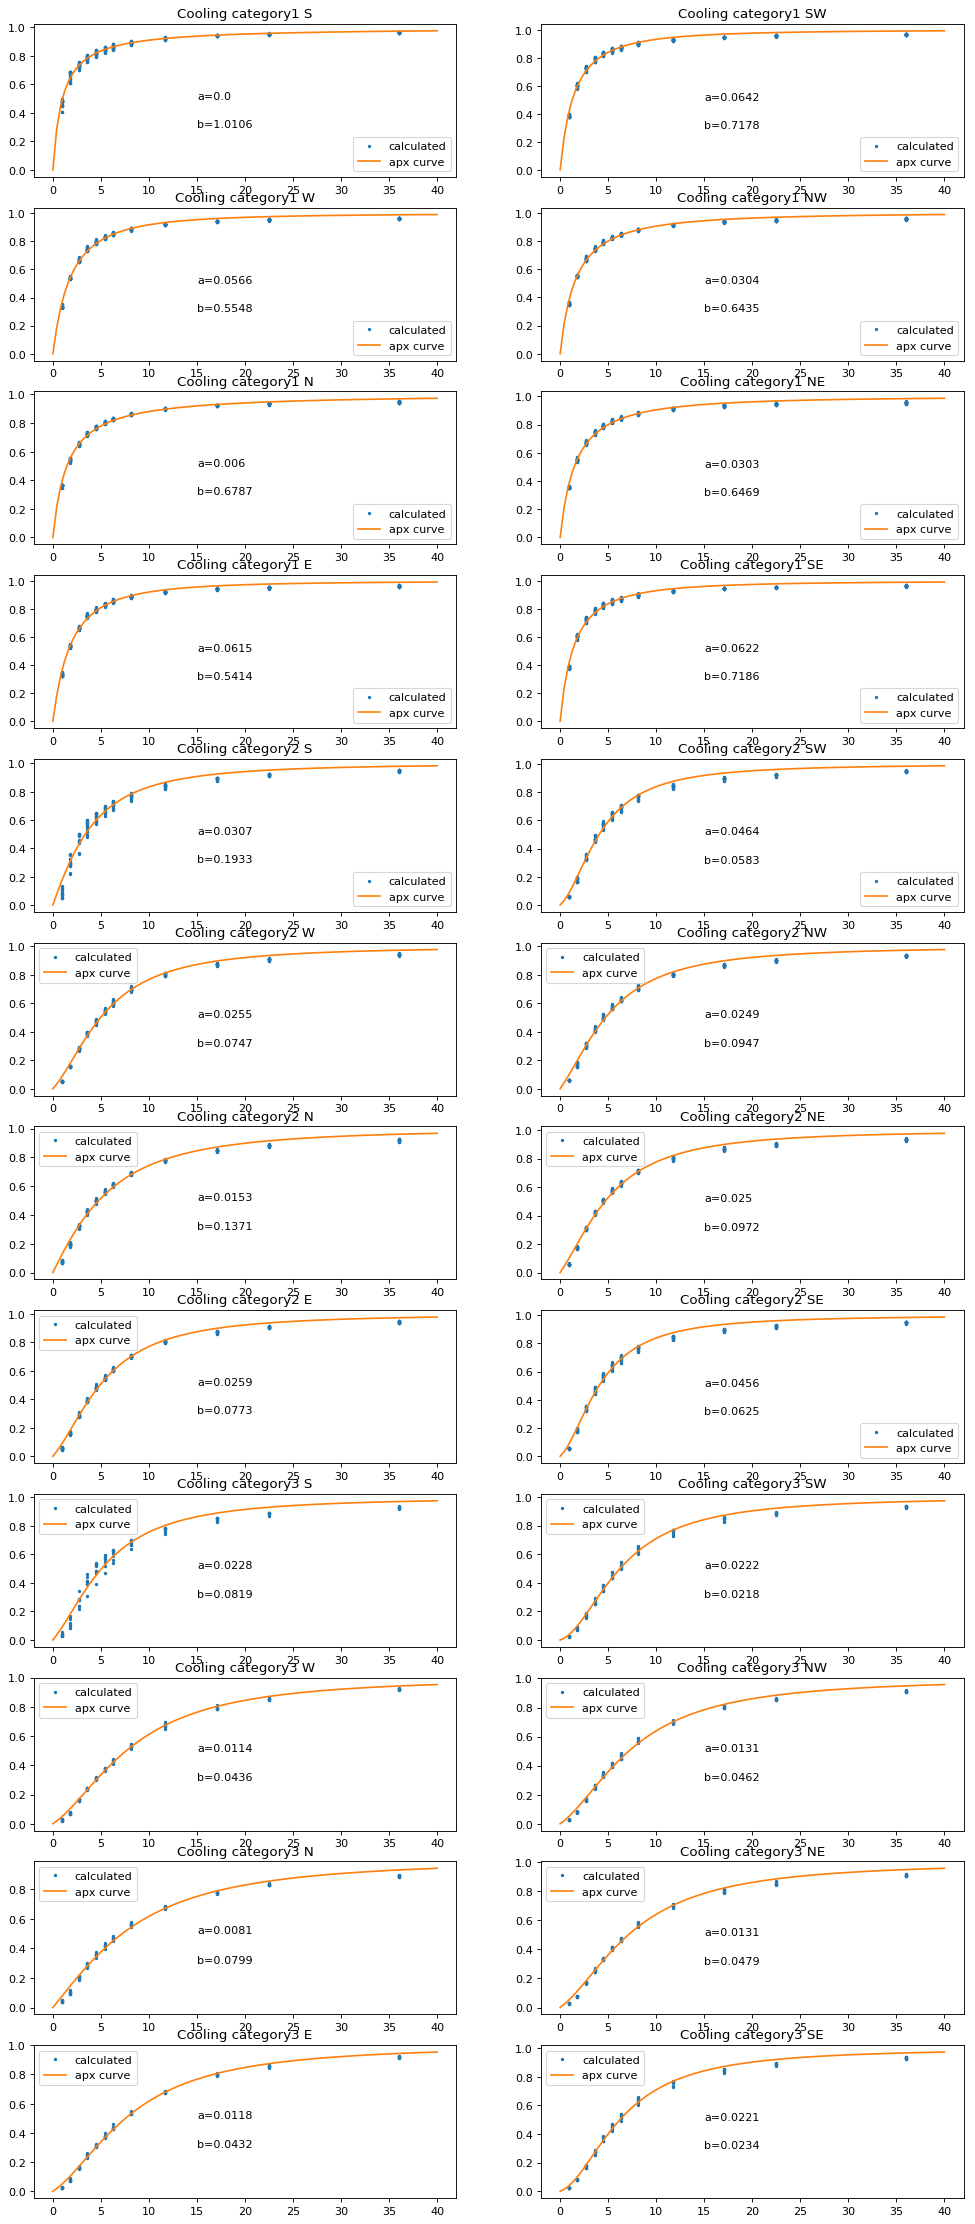

['Cooling_category1_S', 0.0, 1.0105999999999999]
['Cooling_category1_SW', 0.064199999999999993, 0.71779999999999999]
['Cooling_category1_W', 0.056599999999999998, 0.55479999999999996]
['Cooling_category1_NW', 0.0304, 0.64349999999999996]
['Cooling_category1_N', 0.0060000000000000001, 0.67869999999999997]
['Cooling_category1_NE', 0.030300000000000001, 0.64690000000000003]
['Cooling_category1_E', 0.061499999999999999, 0.54139999999999999]
['Cooling_category1_SE', 0.062199999999999998, 0.71860000000000002]
['Cooling_category2_S', 0.030700000000000002, 0.1933]
['Cooling_category2_SW', 0.046399999999999997, 0.058299999999999998]
['Cooling_category2_W', 0.025499999999999998, 0.074700000000000003]
['Cooling_category2_NW', 0.024899999999999999, 0.094700000000000006]
['Cooling_category2_N', 0.015299999999999999, 0.1371]
['Cooling_category2_NE', 0.025000000000000001, 0.097199999999999995]
['Cooling_category2_E', 0.025899999999999999, 0.077299999999999994]
['Cooling_category2_SE', 0.0456000000000

In [12]:
def fit_func(x,a,b):
    return ( a * x ** 2 + b * x)/( a * x ** 2 + b * x + 1)
    

fignum = 24
plt.figure(figsize=(15,3*fignum/2),dpi=80)

s = 'Cooling'
a = []
b = []

for j, c in enumerate([['1to1','2to2','3to3'],['1to2','2to3'],['1to3']]):
    for i, drt in enumerate(direction):
        n = j*8+i
        plt.subplot(fignum/2,2,n+1)
        x = []
        y = []
        for p in c:
            for r in region:
                d = data.query("Region == @r & Season == @s & Pos == @p ")
                x.extend( list(d["Distance"] * 0.9 ) ) # x の単位を unit から m に変換するために 0.9 を乗じている。
                y.extend( list(d[drt]) )
        res = opt.curve_fit(fit_func,x ,y,bounds=(0,np.infty))
        a.append( np.round( res[0][0],4 ) )
        b.append( np.round( res[0][1],4 ) )
        acx = np.linspace(0,40,100)
        acy = fit_func(acx,a[n],b[n])
        plt.plot(x,y,"o",label="calculated", markersize=2)
        plt.plot(acx,acy,label="apx curve")
        plt.text(15,0.5,"a="+str(a[n]) )
        plt.text(15,0.3,"b="+str(b[n]) )
        plt.legend()
        plt.title(str(s)+" category"+str(j+1)+" "+str(drt))
plt.show()

for j, c in enumerate([['1to1','2to2','3to3'],['1to2','2to3'],['1to3']]):
    for i, drt in enumerate(direction):
        n = j*8+i
        print([str(s)+"_category"+str(j+1)+"_"+str(drt),a[n],b[n]])


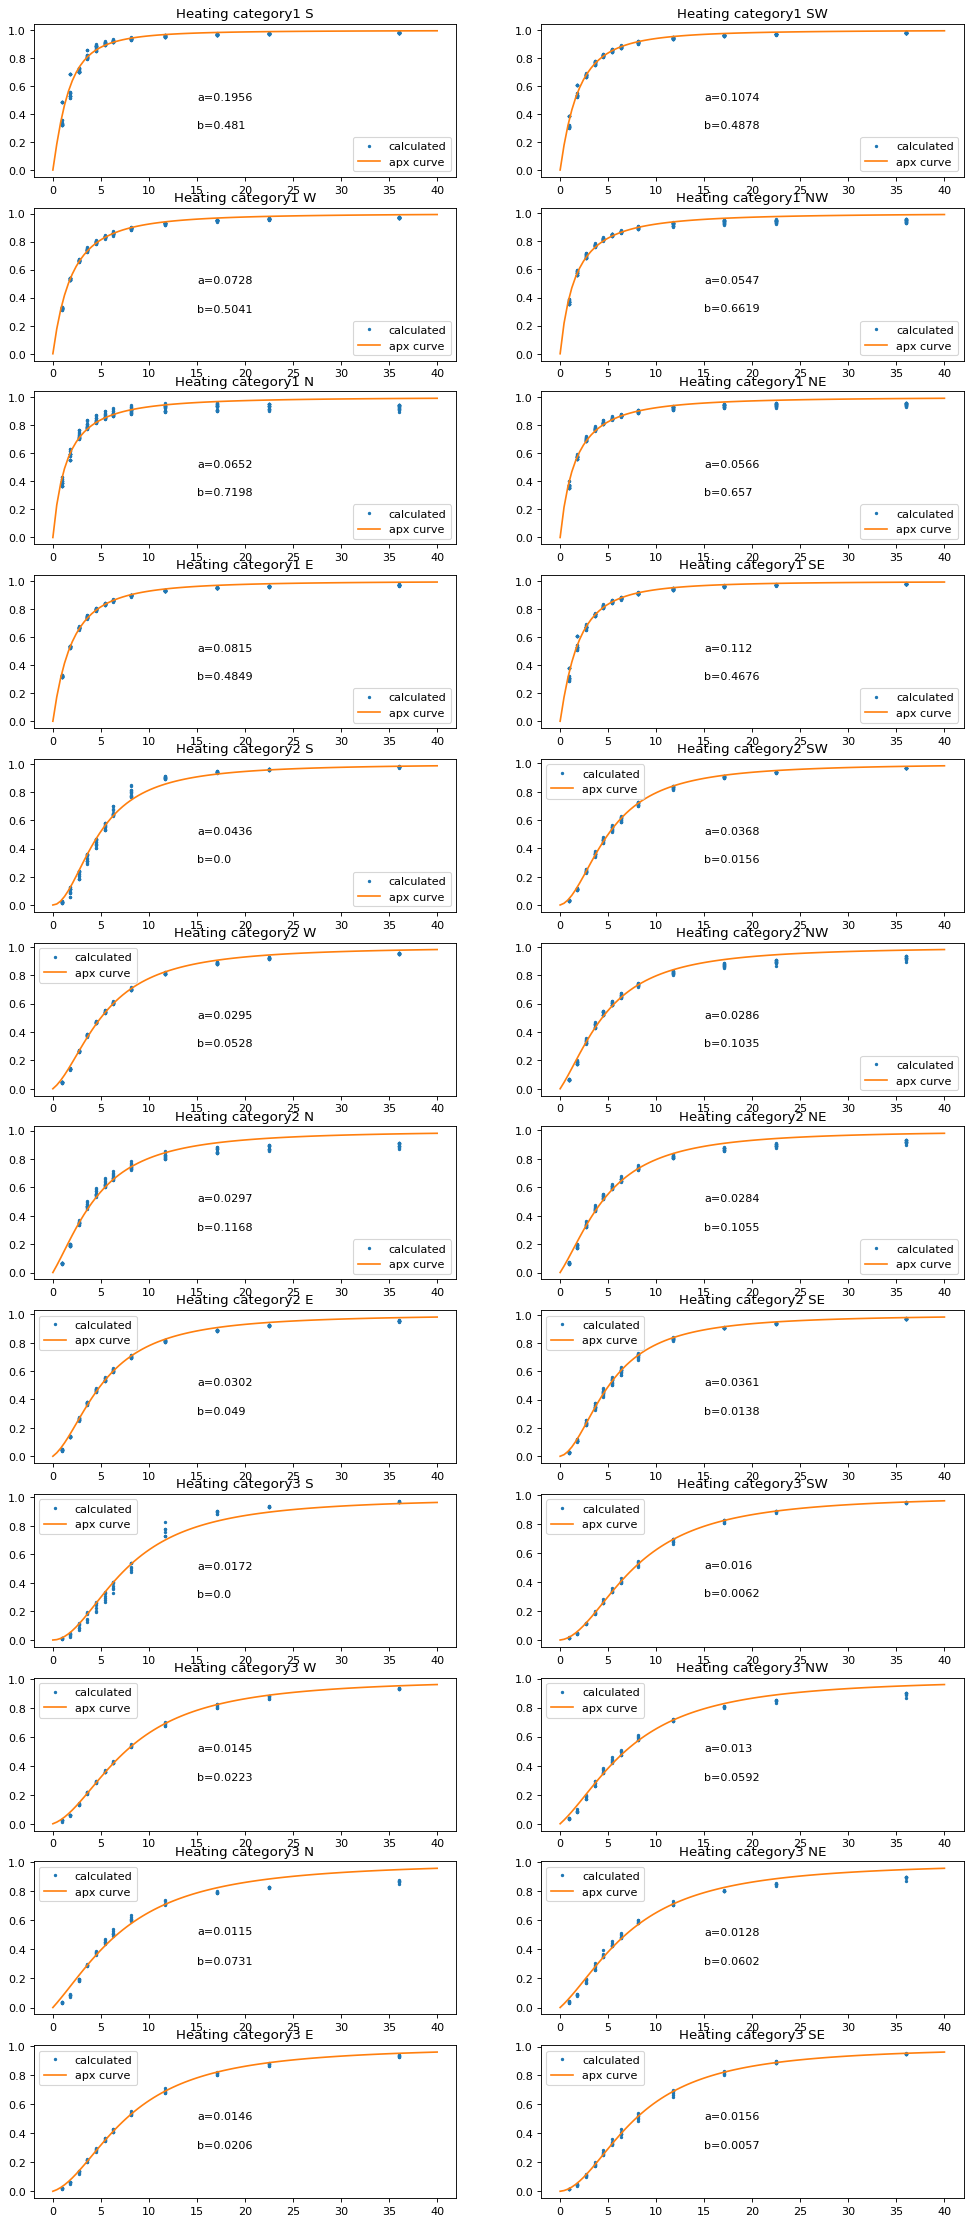

['Heating_category1_S', 0.1956, 0.48099999999999998]
['Heating_category1_SW', 0.1074, 0.48780000000000001]
['Heating_category1_W', 0.072800000000000004, 0.50409999999999999]
['Heating_category1_NW', 0.054699999999999999, 0.66190000000000004]
['Heating_category1_N', 0.065199999999999994, 0.7198]
['Heating_category1_NE', 0.056599999999999998, 0.65700000000000003]
['Heating_category1_E', 0.081500000000000003, 0.4849]
['Heating_category1_SE', 0.112, 0.46760000000000002]
['Heating_category2_S', 0.0436, 0.0]
['Heating_category2_SW', 0.036799999999999999, 0.015599999999999999]
['Heating_category2_W', 0.029499999999999998, 0.0528]
['Heating_category2_NW', 0.0286, 0.10349999999999999]
['Heating_category2_N', 0.029700000000000001, 0.1168]
['Heating_category2_NE', 0.028400000000000002, 0.1055]
['Heating_category2_E', 0.030200000000000001, 0.049000000000000002]
['Heating_category2_SE', 0.0361, 0.0138]
['Heating_category3_S', 0.0172, 0.0]
['Heating_category3_SW', 0.016, 0.0061999999999999998]
['Hea

In [13]:
def fit_func(x,a,b):
    return ( a * x ** 2 + b * x)/( a * x ** 2 + b * x + 1)
    

fignum = 24
plt.figure(figsize=(15,3*fignum/2),dpi=80)

s = 'Heating'
a = []
b = []

for j, c in enumerate([['1to1','2to2','3to3'],['1to2','2to3'],['1to3']]):
    for i, drt in enumerate(direction):
        n = j*8+i
        plt.subplot(fignum/2,2,n+1)
        x = []
        y = []
        for p in c:
            for r in region:
                d = data.query("Region == @r & Season == @s & Pos == @p ")
                x.extend( list(d["Distance"] * 0.9 ) ) # x の単位を unit から m に変換するために 0.9 を乗じている。
                y.extend( list(d[drt]) )
        res = opt.curve_fit(fit_func,x,y,bounds=(0,np.infty))
        a.append( np.round( res[0][0],4 ) )
        b.append( np.round( res[0][1],4 ) )
        acx = np.linspace(0,40,100)
        acy = fit_func(acx,a[n],b[n])
        plt.plot(x,y,"o",label="calculated", markersize=2)
        plt.plot(acx,acy,label="apx curve")
        plt.text(15,0.5,"a="+str(a[n]) )
        plt.text(15,0.3,"b="+str(b[n]) )
        plt.legend()
        plt.title(str(s)+" category"+str(j+1)+" "+str(drt))
plt.show()

for j, c in enumerate([['1to1','2to2','3to3'],['1to2','2to3'],['1to3']]):
    for i, drt in enumerate(direction):
        n = j*8+i
        print([str(s)+"_category"+str(j+1)+"_"+str(drt),a[n],b[n]])


# 方位係数の低減係数の計算方法案

###### 方位係数の低減係数は以下の式で表される。  
$\begin{align}r=\frac{1}{(1+\frac{1}{a x^2 + b x})}\end{align}$  
ここで、  
$r$: 方位係数の低減係数(0～1)  
$x$: 長さ(m)  
である。  
係数$a$、$b$は、暖冷房の別、カテゴリー、方位に応じて、以下の表で定義される。

冷房

| 方位 | Category1 係数a | Category1 係数b | Category2 係数a | Category2 係数b | Category3 係数a | Category3 係数b |
| ---- | --------------- | --------------- | --------------- | --------------- | --------------- | --------------- |
| S  | 0.0000 | 1.0106 | 0.0307 | 0.1933 | 0.0228 | 0.0819 |
| SW | 0.0642 | 0.7178 | 0.0464 | 0.0583 | 0.0222 | 0.0218 |
| W  | 0.0566 | 0.5548 | 0.0255 | 0.0747 | 0.0114 | 0.0436 |
| NW | 0.0304 | 0.6435 | 0.0249 | 0.0947 | 0.0131 | 0.0462 |
| N  | 0.0060 | 0.6787 | 0.0153 | 0.1371 | 0.0081 | 0.0799 |
| NE | 0.0303 | 0.6469 | 0.0250 | 0.0972 | 0.0131 | 0.0479 |
| E  | 0.0615 | 0.5414 | 0.0259 | 0.0773 | 0.0118 | 0.0432 |
| SE | 0.0622 | 0.7186 | 0.0456 | 0.0625 | 0.0221 | 0.0234 |

暖房

| 方位 | Category1 係数a | Category1 係数b | Category2 係数a | Category2 係数b | Category3 係数a | Category3 係数b |
| ---- | --------------- | --------------- | --------------- | --------------- | --------------- | --------------- |
| S  | 0.1956 | 0.4810 | 0.0436 | 0.0000 | 0.0172 | 0.0000 |
| SW | 0.1074 | 0.4878 | 0.0368 | 0.0156 | 0.0160 | 0.0062 |
| W  | 0.0728 | 0.5041 | 0.0295 | 0.0528 | 0.0145 | 0.0223 |
| NW | 0.0547 | 0.6619 | 0.0286 | 0.1035 | 0.0130 | 0.0592 |
| N  | 0.0652 | 0.7198 | 0.0297 | 0.1168 | 0.0115 | 0.0731 |
| NE | 0.0566 | 0.6570 | 0.0284 | 0.1055 | 0.0128 | 0.0602 |
| E  | 0.0815 | 0.4849 | 0.0302 | 0.0490 | 0.0146 | 0.0206 |
| SE | 0.1120 | 0.4676 | 0.0361 | 0.0138 | 0.0156 | 0.0057 |

In [14]:
def get_Coefficient( season, category, direction ):
    v = {
        "Cooling_category1_S" :(0.0000, 1.0106),
        "Cooling_category1_SW":(0.0642, 0.7178),
        "Cooling_category1_W" :(0.0566, 0.5548),
        "Cooling_category1_NW":(0.0304, 0.6435),
        "Cooling_category1_N" :(0.0060, 0.6787),
        "Cooling_category1_NE":(0.0303, 0.6469),
        "Cooling_category1_E" :(0.0615, 0.5414),
        "Cooling_category1_SE":(0.0622, 0.7186),
        "Cooling_category2_S" :(0.0307, 0.1933),
        "Cooling_category2_SW":(0.0464, 0.0583),
        "Cooling_category2_W" :(0.0255, 0.0747),
        "Cooling_category2_NW":(0.0249, 0.0947),
        "Cooling_category2_N" :(0.0153, 0.1371),
        "Cooling_category2_NE":(0.0250, 0.0972),
        "Cooling_category2_E" :(0.0259, 0.0773),
        "Cooling_category2_SE":(0.0456, 0.0625),
        "Cooling_category3_S" :(0.0228, 0.0819),
        "Cooling_category3_SW":(0.0222, 0.0218),
        "Cooling_category3_W" :(0.0114, 0.0436),
        "Cooling_category3_NW":(0.0131, 0.0462),
        "Cooling_category3_N" :(0.0081, 0.0799),
        "Cooling_category3_NE":(0.0131, 0.0479),
        "Cooling_category3_E" :(0.0118, 0.0432),
        "Cooling_category3_SE":(0.0221, 0.0234),
        "Heating_category1_S" :(0.1956, 0.4810),
        "Heating_category1_SW":(0.1074, 0.4878),
        "Heating_category1_W" :(0.0728, 0.5041),
        "Heating_category1_NW":(0.0547, 0.6619),
        "Heating_category1_N" :(0.0652, 0.7198),
        "Heating_category1_NE":(0.0566, 0.6570),
        "Heating_category1_E" :(0.0815, 0.4849),
        "Heating_category1_SE":(0.1120, 0.4676),
        "Heating_category2_S" :(0.0436, 0.0000),
        "Heating_category2_SW":(0.0368, 0.0156),
        "Heating_category2_W" :(0.0295, 0.0528),
        "Heating_category2_NW":(0.0286, 0.1035),
        "Heating_category2_N" :(0.0297, 0.1168),
        "Heating_category2_NE":(0.0284, 0.1055),
        "Heating_category2_E" :(0.0302, 0.0490),
        "Heating_category2_SE":(0.0361, 0.0138),
        "Heating_category3_S" :(0.0172, 0.0000),
        "Heating_category3_SW":(0.0160, 0.0062),
        "Heating_category3_W" :(0.0145, 0.0223),
        "Heating_category3_NW":(0.0130, 0.0592),
        "Heating_category3_N" :(0.0115, 0.0731),
        "Heating_category3_NE":(0.0128, 0.0602),
        "Heating_category3_E" :(0.0146, 0.0206),
        "Heating_category3_SE":(0.0156, 0.0057)  }
    
    return v[ season + "_" + "category" + str(category) + "_" + direction ]

In [15]:
def get_distance_coefficient_degradation( d, season, category, direction ):
    # d : 隣等距離(m)
    x = d
    a, b = get_Coefficient( season, category, direction )
    return ( a * x ** 2 + b * x)/( a * x ** 2 + b * x + 1)

## 試算結果

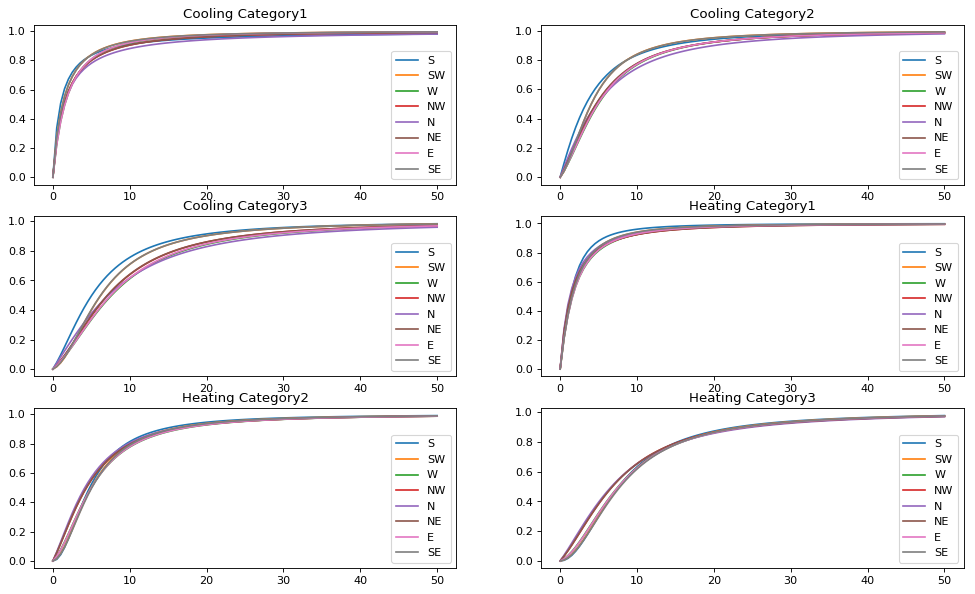

In [16]:
fignum = 6
plt.figure(figsize=(15,3*fignum/2),dpi=80)

acx = np.linspace(0,50,100) # 単位は(m)

for k, s in enumerate(['Cooling','Heating']):
    for j, c in enumerate([1,2,3]):
        plt.subplot(fignum/2,2,k*3+j+1)
        for i, drt in enumerate(["S","SW","W","NW","N","NE","E","SE"]):
            acy = get_distance_coefficient_degradation( acx, s, c, drt )
            plt.plot(acx,acy,label=drt)
        plt.title(str(s)+" Category"+str(c))
        plt.legend()

plt.show()

## 一次エネ評価上での扱いについて

本来であれば、部位ごとにカテゴリ1～3を入力すべきであるが、一次エネ評価上ではあまり入力に手間がかかりすぎるのもよくない。  
そこで、デフォルト値としてCategory 2 で代表させることにする。

# 区域建蔽率と隣棟距離との関係

## 根拠

本資料のもととなるデータ等は、国総研からの業務発注報告書「H26度 住宅外皮の省エネ技術の定量的評価方法確立のための解析業務」を根拠とする。

## 用語

区域建蔽率・・・当該住宅を中心に平面的に円状の範囲に入る建物面積の割合。  
地域建蔽率・・・所謂建蔽率のこと。  
区域建蔽率と地域建蔽率とは定義が異なるが、ほぼ同じような値になるため、ここでは区別せずに使用する。  

## 関係式

隣棟距離は以下の式で表される。  
$\begin{align} d = 67.10 \exp ^ { ( -6.05 r_{bc} ) } \end{align}$  
ここで、  
$d$: 隣等距離(m)  
$r_{bc}$: 区域建蔽率  
である。  

In [17]:
def distance_rbc(rbc):
    return 67.10 * np.exp( -6.05 * rbc )

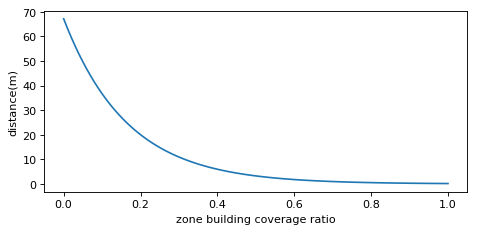

In [18]:
fignum = 2
plt.figure(figsize=(15,3*fignum/2),dpi=80)

plt.subplot(fignum/2,2,1)

x = np.linspace(0,1,100) # 区域建蔽率(0～1)
y = distance_rbc( x )

plt.xlabel("zone building coverage ratio")
plt.ylabel("distance(m)")
plt.plot( x, y)

plt.show()

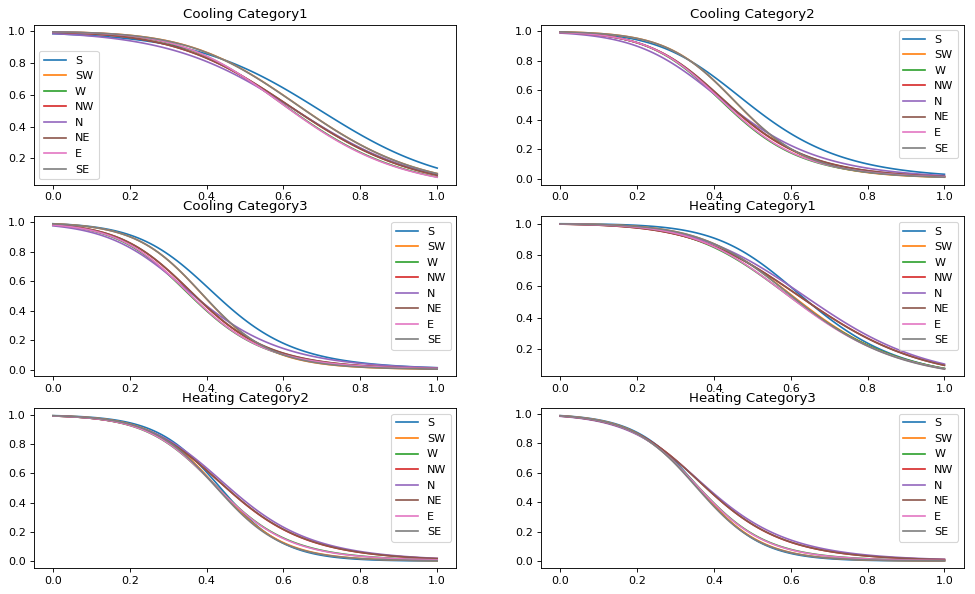

In [19]:
fignum = 6
plt.figure(figsize=(15,3*fignum/2),dpi=80)

acx = np.linspace(0,1,100) # 区域建蔽率

d = distance_rbc(acx)

for k, s in enumerate(['Cooling','Heating']):
    for j, c in enumerate([1,2,3]):
        plt.subplot(fignum/2,2,k*3+j+1)
        for i, drt in enumerate(["S","SW","W","NW","N","NE","E","SE"]):
            acy = get_distance_coefficient_degradation( d, s, c, drt )
            plt.plot(acx,acy,label=drt)
        plt.title(str(s)+" Category"+str(c))
        plt.legend()

plt.show()

# 立地と地域建蔽率

## 自立循環型住宅への設計プログラム温暖地版における定義

### 1) 自然風の利用における定義

| 立地  | 名称         | 区域建蔽率 |
| ----- | ------------ | ---------- |
| 立地1 | 都市型の立地 | 20%超      |
| 立地2 | 郊外型の立地 | 20%以下    |

### 2) 昼光利用における定義

| 立地  | 名称                                   |
| ----- | -------------------------------------- |
| 立地1 | 太陽光の利用が困難な過密・高層型の立地 |
| 立地2 | 太陽光の利用に工夫が必要な過密型の立地 |
| 立地3 | 太陽光の利用が容易な郊外型の立地       |

### 3) 日射遮蔽における定義

| 立地  | 名称                 | 壁面高さに対する隣棟間隔の比 | 隣棟間隔(m) | 区域建蔽率(%)※ | 冷房期の隣棟遮蔽係数(%) |
| ----- | -------------------- | ---------------------------- | ----------- | ------------- | ----------------------- |
| 立地1 | 郊外                 | 2.2                          | 15.5        | 24.2          | 89.0                    |
| 立地2 | 密集していない都市部 | 1.8                          | 12.3        | 28.0          | 83.0                    |
| 立地3 | 密集都市部           | 0.6                          | 4.5         | 44.7          | 58.0                    |

※ 区域建蔽率は、隣棟間隔から上記の関係式を用いて計算した。

隣棟遮蔽係数は、方位・隣棟との関係（カテゴリ・隣棟の相対的な高さ）に応じて定まる値である。  
ここでは、自立ガイドラインに公開されている値と、方位・隣棟との関係に応じて計算される値とを比較した。

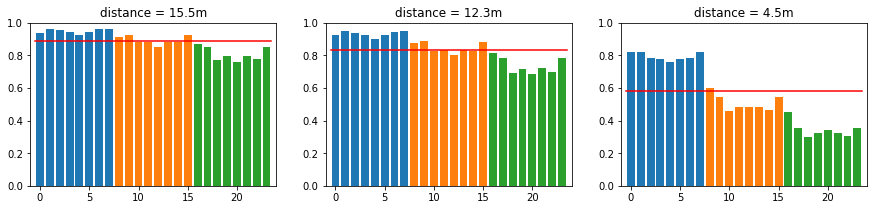

In [20]:
drt = ['S','SW','W','NW','N','NE','E','SE']

plt.figure(figsize= (15,3))

distance = [15.5, 12.3, 4.5]
expected = [0.89, 0.83, 0.58]

for fn in [1,2,3]:
    plt.subplot(1,3,fn)
    n = 0
    for c in [1,2,3]:
        x = []
        y = []
        for r in drt:
            x.append(n)
            y.append(get_distance_coefficient_degradation(distance[fn-1], 'Cooling', c, r))
            n = n + 1
        plt.bar(x,y)
    plt.plot( [ -0.5,23.5 ] , [ expected[fn-1], expected[fn-1] ], "r" )
    plt.axis([-1,24,0,1])
    plt.title("distance = " + str(distance[fn-1]) + "m")
plt.show()

### 4) 日射熱の利用における定義

| 立地  | 名称                 | 地域建蔽率(%) | 暖房期の隣棟遮蔽係数(%) |
| ----- | -------------------- | ------------- | ----------------------- |
| 立地1 | 郊外                 | 25.0          | 96.0                    |
| 立地2 | 密集していない都市部 | 35.0          | 88.0                    |
| 立地3 | 密集都市部           | 50.0          | 59.0                    |

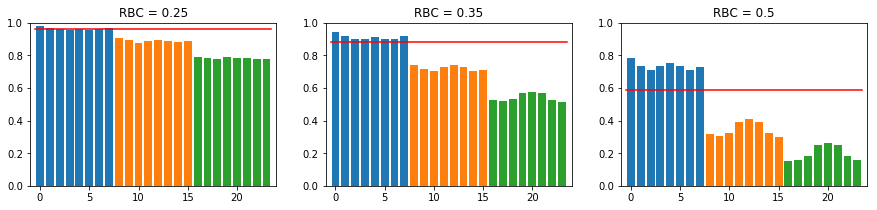

In [21]:
drt = ['S','SW','W','NW','N','NE','E','SE']

plt.figure(figsize= (15,3))

RBC = [0.25, 0.35, 0.5]
expected = [0.96, 0.88, 0.59]

for fn in [1,2,3]:
    plt.subplot(1,3,fn)
    n = 0
    for c in [1,2,3]:
        x = []
        y = []
        for r in drt:
            x.append(n)
            y.append(get_distance_coefficient_degradation(distance_rbc(RBC[fn-1]), 'Heating', c, r))
            n = n + 1
        plt.bar(x,y)
    plt.plot( [ -0.5,23.5 ] , [ expected[fn-1], expected[fn-1] ], "r" )
    plt.axis([-1,24,0,1])
    plt.title("RBC = " + str(RBC[fn-1]) )
plt.show()

## 立地の定義(日射熱の遮蔽・取得)

立地については、以下のように要素技術によって定義がことなるが、「日射熱の利用」にあるように以下のように定義する。

| 立地  | 名称                 | 地域建蔽率(%) | 隣棟との距離(m) |
| ----- | -------------------- | ------------- | --------------- |
| 立地1 | 郊外                 | 25.0          | 14.8            |
| 立地2 | 密集していない都市部 | 35.0          |  8.1            |
| 立地3 | 密集都市部           | 50.0          |  3.3            |

In [22]:
np.vectorize(distance_rbc)([0.25,0.35,0.5])

array([ 14.78604816,   8.07428277,   3.25822981])